In [422]:
!pip install quandl

In [470]:
import quandl as qdl
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')

%matplotlib inline

In [424]:
qdl.ApiConfig.api_key = 'a622SeYGWh6AB16uEasV'

In [425]:
start_date = datetime.datetime(2016,1,1)
end_date = datetime.datetime(2018,1,1)

df_prices = qdl.get('WIKI/GOOGL', start_date=start_date, end_date=end_date)

In [426]:
df_prices.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,762.20,762.20,747.5400,759.44,3369068.0,0.0,1.0,762.20,762.20,747.5400,759.44,3369068.0
2016-01-05,764.10,769.20,755.6500,761.53,2260795.0,0.0,1.0,764.10,769.20,755.6500,761.53,2260795.0
2016-01-06,750.37,765.73,748.0000,759.33,2410301.0,0.0,1.0,750.37,765.73,748.0000,759.33,2410301.0
2016-01-07,746.49,755.31,735.2800,741.00,3156563.0,0.0,1.0,746.49,755.31,735.2800,741.00,3156563.0
2016-01-08,747.80,750.12,728.9201,730.91,2375348.0,0.0,1.0,747.80,750.12,728.9201,730.91,2375348.0


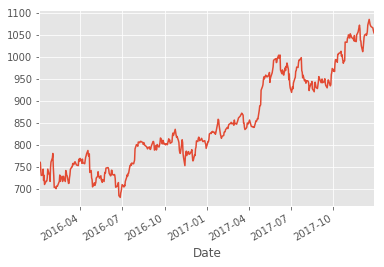

In [427]:
df_prices.Close.plot()

In [428]:
df_prices['close_d1'] = df_prices["Adj. Close"].shift(1)
df_prices['close_d2'] = df_prices["Adj. Close"].shift(2)
df_prices['close_d3'] = df_prices["Adj. Close"].shift(3)
df_prices['close_d4'] = df_prices["Adj. Close"].shift(4)
df_prices['close_d5'] = df_prices["Adj. Close"].shift(5)

In [429]:
df_prices = df_prices.reset_index()

In [430]:
df_prices['y'] = df_prices["Adj. Close"].shift(-1)

In [431]:
df_prices = df_prices.dropna()

In [432]:
from sklearn.model_selection import train_test_split

In [433]:
X_train,X_test,Y_train,Y_test = train_test_split(df_prices.drop(["Date", "Open", "High", "Low", "Close", "Ex-Dividend", "Split Ratio", "Adj. Open", "Adj. High", "Adj. Low", "Volume", "Adj. Volume", "y"], axis=1), df_prices['y'], test_size=0.3)

In [434]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [435]:
from sklearn.neural_network import MLPRegressor

In [436]:
model = MLPRegressor(activation="tanh", max_iter=10000)

In [437]:
model.fit(X_train_scaled,Y_train)

MLPRegressor(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [438]:
pred = model.predict(X_train_scaled)

In [439]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

mae = mean_absolute_error(Y_train, pred)
mse = mean_squared_error(Y_train, pred)
msle = mean_squared_log_error(Y_train, pred)
var = explained_variance_score(Y_train, pred)
r2 = r2_score(Y_train, pred)

print("MAE: " + str(mae))
print("MSE: " + str(mse))
print("MSLE: " + str(mse))
print("Explained Variance Score: " + str(var))
print("R2: " + str(r2))

MAE: 8.09620710321
MSE: 121.816885751
MSLE: 121.816885751
Explained Variance Score: 0.989246704291
R2: 0.989245230125


In [440]:
pred = model.predict(X_test_scaled)

In [441]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

mae = mean_absolute_error(Y_test, pred)
mse = mean_squared_error(Y_test, pred)
msle = mean_squared_log_error(Y_test, pred)
var = explained_variance_score(Y_test, pred)
r2 = r2_score(Y_test, pred)

print("MAE: " + str(mae))
print("MSE: " + str(mse))
print("MSLE: " + str(mse))
print("Explained Variance Score: " + str(var))
print("R2: " + str(r2))

MAE: 7.91056266026
MSE: 114.95137092
MSLE: 114.95137092
Explained Variance Score: 0.989595318841
R2: 0.989587557038


In [442]:
dataset_scaled = scaler.transform(df_prices.drop(["Date", "Open", "High", "Low", "Close", "Ex-Dividend", "Split Ratio", "Adj. Open", "Adj. High", "Adj. Low", "Volume", "Adj. Volume", "y"], axis=1))

In [443]:
pred = model.predict(dataset_scaled)

In [444]:
df_prices['pred'] = pred

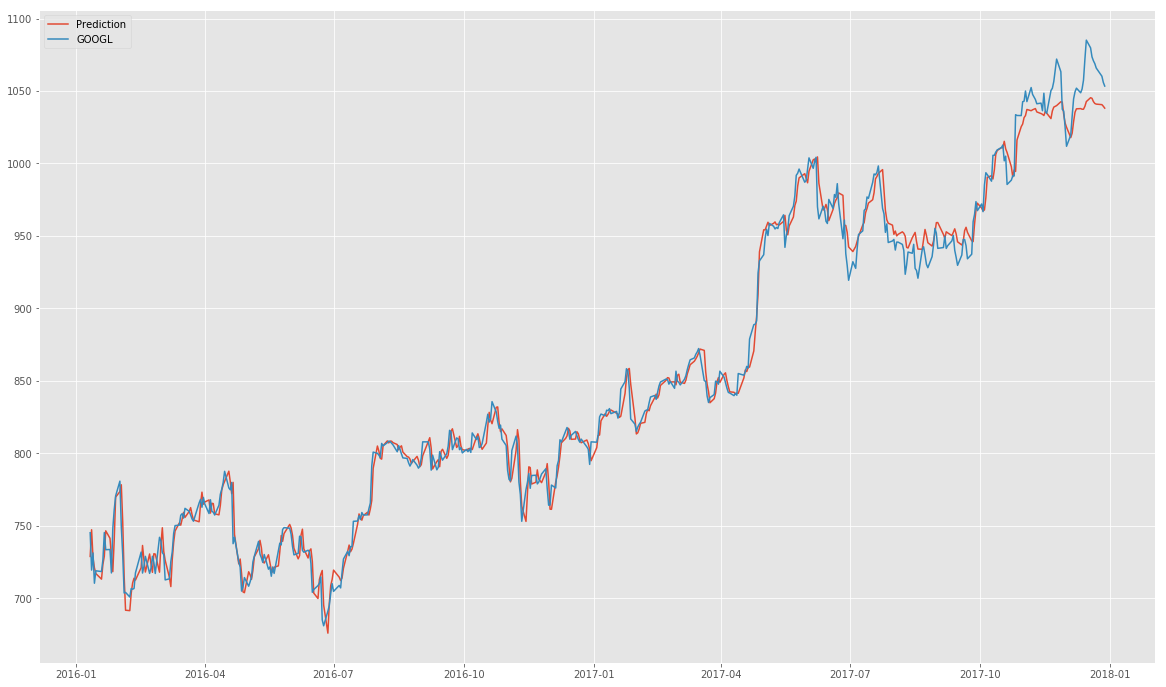

In [448]:
fig = plt.figure(figsize=(20,12))

plt.plot(df_prices['Date'], df_prices['pred'], label="Prediction", )
plt.plot(df_prices['Date'], df_prices['y'], label="GOOGL")

plt.legend()

In [467]:
df_prices['signal'] = np.where(df_prices['pred'] > df_prices['Adj. Open']*1.005, 1, -1)

In [468]:
df_prices.head(10)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,...,Adj. Volume,close_d1,close_d2,close_d3,close_d4,close_d5,y,pred,hypothetical_pnl,signal
5,2016-01-11,731.95,735.080,719.560,733.07,2544806.0,0.0,1.0,731.95,735.080,...,2544806.0,730.91,741.00,759.33,761.53,759.44,745.34,728.993015,0.0,-1
6,2016-01-12,740.75,748.340,736.430,745.34,2340753.0,0.0,1.0,740.75,748.340,...,2340753.0,733.07,730.91,741.00,759.33,761.53,719.57,747.392600,0.0,1
7,2016-01-13,749.34,753.000,716.780,719.57,2586395.0,0.0,1.0,749.34,753.000,...,2586395.0,745.34,733.07,730.91,741.00,759.33,731.39,727.989837,0.0,-1
8,2016-01-14,724.44,739.890,705.000,731.39,2777868.0,0.0,1.0,724.44,739.890,...,2777868.0,719.57,745.34,733.07,730.91,741.00,710.49,721.119241,0.0,-1
9,2016-01-15,709.99,724.158,701.510,710.49,3833751.0,0.0,1.0,709.99,724.158,...,3833751.0,731.39,719.57,745.34,733.07,730.91,719.08,717.174931,0.0,1
10,2016-01-19,720.15,725.350,709.850,719.08,2436220.0,0.0,1.0,720.15,725.350,...,2436220.0,710.49,731.39,719.57,745.34,733.07,718.56,713.323437,0.0,-1
11,2016-01-20,705.90,726.950,687.780,718.56,4122010.0,0.0,1.0,705.90,726.950,...,4122010.0,719.08,710.49,731.39,719.57,745.34,726.67,723.561447,0.0,1
12,2016-01-21,720.17,737.670,711.110,726.67,2596916.0,0.0,1.0,720.17,737.670,...,2596916.0,718.56,719.08,710.49,731.39,719.57,745.46,729.110135,0.0,1
13,2016-01-22,742.00,748.560,740.500,745.46,2357315.0,0.0,1.0,742.00,748.560,...,2357315.0,726.67,718.56,719.08,710.49,731.39,733.62,746.653700,0.0,1
14,2016-01-25,743.84,752.460,732.501,733.62,2267031.0,0.0,1.0,743.84,752.460,...,2267031.0,745.46,726.67,718.56,719.08,710.49,733.79,741.483420,0.0,-1


In [471]:
# Set the initial capital
initial_capital= float(10000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=df_prices.index).fillna(0.0)

# Buy a 100 shares
positions['GOOGL'] = 100*df_prices['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(df_prices['Adj. Open'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(df_prices['Adj. Open'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df_prices['Adj. Open'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

In [472]:
portfolio.head()

,GOOGL,holdings,cash,total,returns
5,-73195.0,-73195.0,10000.0,-63195.0,NaN
6,74075.0,74075.0,-138150.0,-64075.0,0.013925
7,-74934.0,-74934.0,11718.0,-63216.0,-0.013406
8,-72444.0,-72444.0,11718.0,-60726.0,-0.039389
9,70999.0,70999.0,-130280.0,-59281.0,-0.023795


In [478]:
print('Total Strategy Returns: ' + str(portfolio.returns.sum()*100) + '%')

Total Strategy Returns: 339.59727861997095%


In [480]:
print('Buy & Hold Returns: ' + str((df_prices['Adj. Close'].tail(1).values[0]/df_prices['Adj. Close'].head(1).values[0])*100) + '%')

Buy & Hold Returns: 144.044907035%


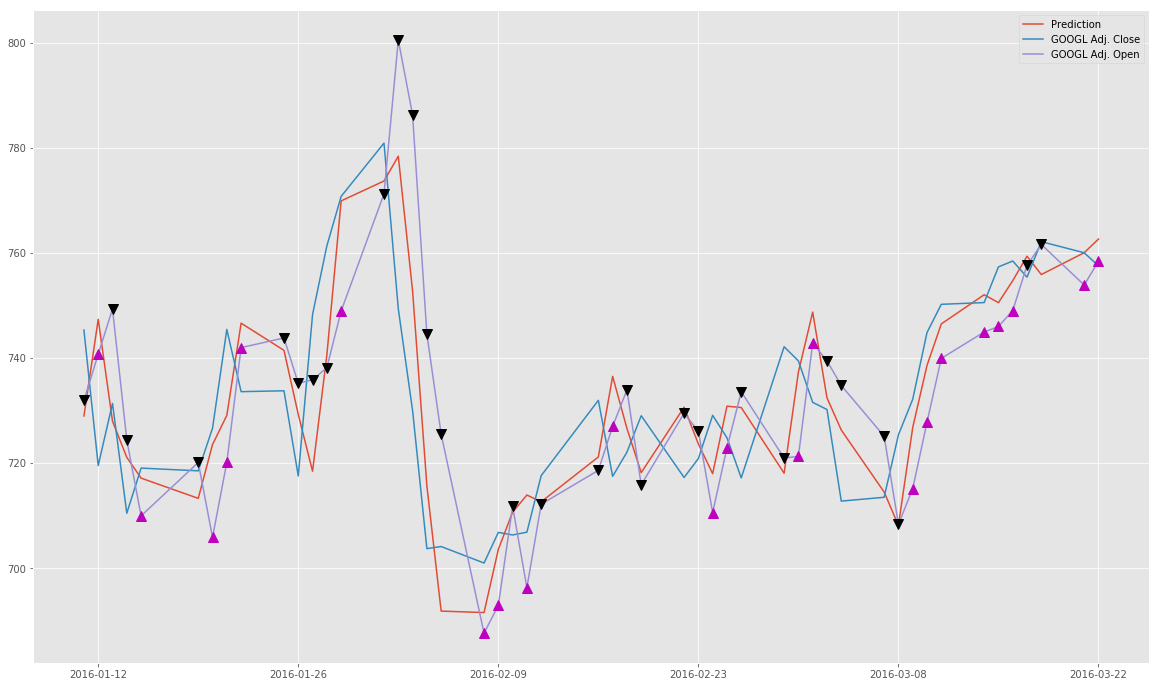

In [485]:
subset = df_prices[:50]

fig = plt.figure(figsize=(20,12))

plt.plot(subset['Date'], subset['pred'], label="Prediction", )
plt.plot(subset['Date'], subset['y'], label="GOOGL Adj. Close")
plt.plot(subset['Date'], subset['Adj. Open'], label="GOOGL Adj. Open", )

plt.legend()

# Plot the buy signals
plt.plot(subset['Date'].loc[subset['signal'] == 1.0], 
         subset['Adj. Open'].loc[subset['signal'] == 1.0],
         '^', markersize=10, color='m')

# Plot the buy signals
plt.plot(subset['Date'].loc[subset['signal'] == -1.0], 
         subset['Adj. Open'].loc[subset['signal'] == -1.0],
         'v', markersize=10, color='k')